In [3]:

###############################################################################
#                          1. Importing Libraries                             #
###############################################################################
# For reading, processing, and visualizing data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import datetime

# To make candlestick charts
from mpl_finance import candlestick_ohlc
import mplfinance as mpf

# For reading files
from os import listdir

c:\Users\kemil\AppData\Local\Programs\Python\Python310\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [4]:

def get_data(data_prefix, start_date, end_date):
    
    # Get file names in directory
    file_names = listdir(data_prefix)
            
    # Initiliaze data directory that will contain all the data.
    data = {}
    
    # Get data
    for file_name in file_names:
        # Read data
        df = pd.read_csv(data_prefix + file_name)
        
        # Set mask to select dates , filter for the df, returns all rows where True
        mask = (df["Date"] > start_date) & (df["Date"] <= end_date)
        
        # Select data between start and end date
        df = df.loc[mask]
        
        # Get timestamps
        dates = [pd.Timestamp(date) for date in df.Date]
        
        # Drop "Date" column
        df = df.drop(["Date"], axis = 1)
        
        # Make dataframe 
        df = pd.DataFrame(df.values, columns = df.columns, index = dates)
        
        # Update dictionary
        data.update({file_name[:-4]: df})
        
    return data

    """Reads all the files located in the data_prefix directory.
    
    Parameters
    ----------
    
    data_prefix : str
        String object describing path to where the data is located.
                 
    start_date : str
        String object describing the first date to consider
    
    end_date : str
        String object describing the last date to consider
    
    
    Returns
    ----------
    data: dict
        Dictionary object where the keys of the dictionary are the file
        names (without the file extension) and each entry a Pandas
        Dataframe object that contains the data of the file denoted by
        the key.      
    
    Example
    -------
    To read the data between 2014-01-01 and 2018-01-01 contained in the files
    stored in the folder specified by data_prefix: 
        
        # Path to directory where the data is saved
        data_prefix = "C:\\Users\\Pancho\\Documents\\StockMarketData"
    
        # Earliest and latest date to consider
        start_date = "2014-01-01" %"Year-Month-Day"
        end_date   = "2018-01-01"
        
        # Read data
        data = get_data(data_prefix, start_date, end_date)
        
    Author Information
    ------------------
    Frank Ceballos
    LinkedIn: <https://www.linkedin.com/in/frank-ceballos/>
    Date: August, 24, 2019
    """

In [5]:

# Path to directory where the data is saved
data_prefix = "C:\\Users\\kemil\\Documents\\stockdata\\"

# Define time period to consider
start_date = "2017-01-01"
end_date   = "2022-07-31"

# Use helper function to read data
data = get_data(data_prefix, start_date, end_date)

In [6]:
data 

{'01AAPL':                   Open        High         Low       Close   Adj Close  \
 2017-08-22   39.557499   40.000000   39.505001   39.945000   37.910412   
 2017-08-23   39.767502   40.117500   39.720001   39.994999   37.957874   
 2017-08-24   40.107498   40.185001   39.637501   39.817501   37.789413   
 2017-08-25   39.912498   40.139999   39.817501   39.965000   37.929405   
 2017-08-28   40.035000   40.500000   39.982498   40.367500   38.311390   
 ...                ...         ...         ...         ...         ...   
 2022-07-25  154.009995  155.039993  152.279999  152.949997  152.737839   
 2022-07-26  152.259995  153.089996  150.800003  151.600006  151.389725   
 2022-07-27  152.580002  157.330002  152.160004  156.789993  156.572510   
 2022-07-28  156.979996  157.639999  154.410004  157.350006  157.131744   
 2022-07-29  161.240005  163.630005  159.500000  162.509995  162.284576   
 
                  Volume  
 2017-08-22   86418400.0  
 2017-08-23   77596400.0  
 2017-0

In [7]:
data['02NFLX']

,Open,High,Low,Close,Adj Close,Volume
2017-08-22,167.759995,169.929993,167.039993,169.339996,169.339996,4886300.0
2017-08-23,168.350006,169.639999,166.699997,169.059998,169.059998,4632300.0
2017-08-24,169.860001,171.240005,166.149994,168.130005,168.130005,5361700.0
2017-08-25,168.580002,168.750000,165.500000,165.949997,165.949997,4064000.0
2017-08-28,166.429993,168.669998,165.600006,167.119995,167.119995,3657300.0
...,...,...,...,...,...,...
2022-07-25,221.309998,225.229996,216.350006,218.509995,218.509995,10935200.0
2022-07-26,216.660004,219.389999,211.639999,213.910004,213.910004,9508500.0
2022-07-27,216.479996,227.779999,214.580002,226.750000,226.750000,10508400.0
2022-07-28,224.600006,228.100006,219.669998,226.020004,226.020004,8972700.0


In [8]:
data['03META']

,Open,High,Low,Close,Adj Close,Volume
2017-08-22,168.279999,169.869995,167.149994,169.639999,169.639999,11391000.0
2017-08-23,168.839996,169.360001,168.199997,168.710007,168.710007,9856500.0
2017-08-24,168.880005,169.289993,166.410004,167.740005,167.740005,14030400.0
2017-08-25,167.860001,168.380005,166.179993,166.320007,166.320007,12614500.0
2017-08-28,166.910004,167.699997,166.330002,167.240005,167.240005,8553700.0
...,...,...,...,...,...,...
2022-07-25,169.000000,170.570007,164.809998,166.649994,166.649994,26166300.0
2022-07-26,165.940002,166.000000,157.949997,159.149994,159.149994,28468400.0
2022-07-27,162.589996,170.869995,162.020004,169.580002,169.580002,43846600.0
2022-07-28,161.059998,161.509995,154.850006,160.720001,160.720001,73214300.0


In [9]:
data['04GOOG']

,Open,High,Low,Close,Adj Close,Volume
2017-08-23,46.096500,46.496498,45.967999,46.349998,46.349998,21804000.0
2017-08-24,46.432999,46.542000,45.775002,46.063999,46.063999,25406000.0
2017-08-25,46.174500,46.277748,45.775002,45.794498,45.794498,21068000.0
2017-08-28,45.799999,45.962250,45.593498,45.690498,45.690498,21730000.0
2017-08-29,45.255001,46.166500,45.250000,46.064499,46.064499,23712000.0
...,...,...,...,...,...,...
2022-07-25,108.879997,110.580002,107.010002,108.209999,108.209999,28289900.0
2022-07-26,107.430000,107.739998,104.760002,105.440002,105.440002,36626600.0
2022-07-27,109.599998,114.400002,108.419998,113.599998,113.599998,41474600.0
2022-07-28,112.800003,114.699997,111.850998,114.589996,114.589996,23303800.0


In [10]:
data.values()

dict_values([                  Open        High         Low       Close   Adj Close  \
2017-08-22   39.557499   40.000000   39.505001   39.945000   37.910412   
2017-08-23   39.767502   40.117500   39.720001   39.994999   37.957874   
2017-08-24   40.107498   40.185001   39.637501   39.817501   37.789413   
2017-08-25   39.912498   40.139999   39.817501   39.965000   37.929405   
2017-08-28   40.035000   40.500000   39.982498   40.367500   38.311390   
...                ...         ...         ...         ...         ...   
2022-07-25  154.009995  155.039993  152.279999  152.949997  152.737839   
2022-07-26  152.259995  153.089996  150.800003  151.600006  151.389725   
2022-07-27  152.580002  157.330002  152.160004  156.789993  156.572510   
2022-07-28  156.979996  157.639999  154.410004  157.350006  157.131744   
2022-07-29  161.240005  163.630005  159.500000  162.509995  162.284576   

                 Volume  
2017-08-22   86418400.0  
2017-08-23   77596400.0  
2017-08-24   7927560

In [11]:
data.items()

dict_items([('01AAPL',                   Open        High         Low       Close   Adj Close  \
2017-08-22   39.557499   40.000000   39.505001   39.945000   37.910412   
2017-08-23   39.767502   40.117500   39.720001   39.994999   37.957874   
2017-08-24   40.107498   40.185001   39.637501   39.817501   37.789413   
2017-08-25   39.912498   40.139999   39.817501   39.965000   37.929405   
2017-08-28   40.035000   40.500000   39.982498   40.367500   38.311390   
...                ...         ...         ...         ...         ...   
2022-07-25  154.009995  155.039993  152.279999  152.949997  152.737839   
2022-07-26  152.259995  153.089996  150.800003  151.600006  151.389725   
2022-07-27  152.580002  157.330002  152.160004  156.789993  156.572510   
2022-07-28  156.979996  157.639999  154.410004  157.350006  157.131744   
2022-07-29  161.240005  163.630005  159.500000  162.509995  162.284576   

                 Volume  
2017-08-22   86418400.0  
2017-08-23   77596400.0  
2017-08-24

Keys in the dictionary represent, each csv file with each company's data

In [12]:
data.keys()

dict_keys(['01AAPL', '02NFLX', '03META', '04GOOG', '05TSLA', '06AMZN'])

Visualize the data

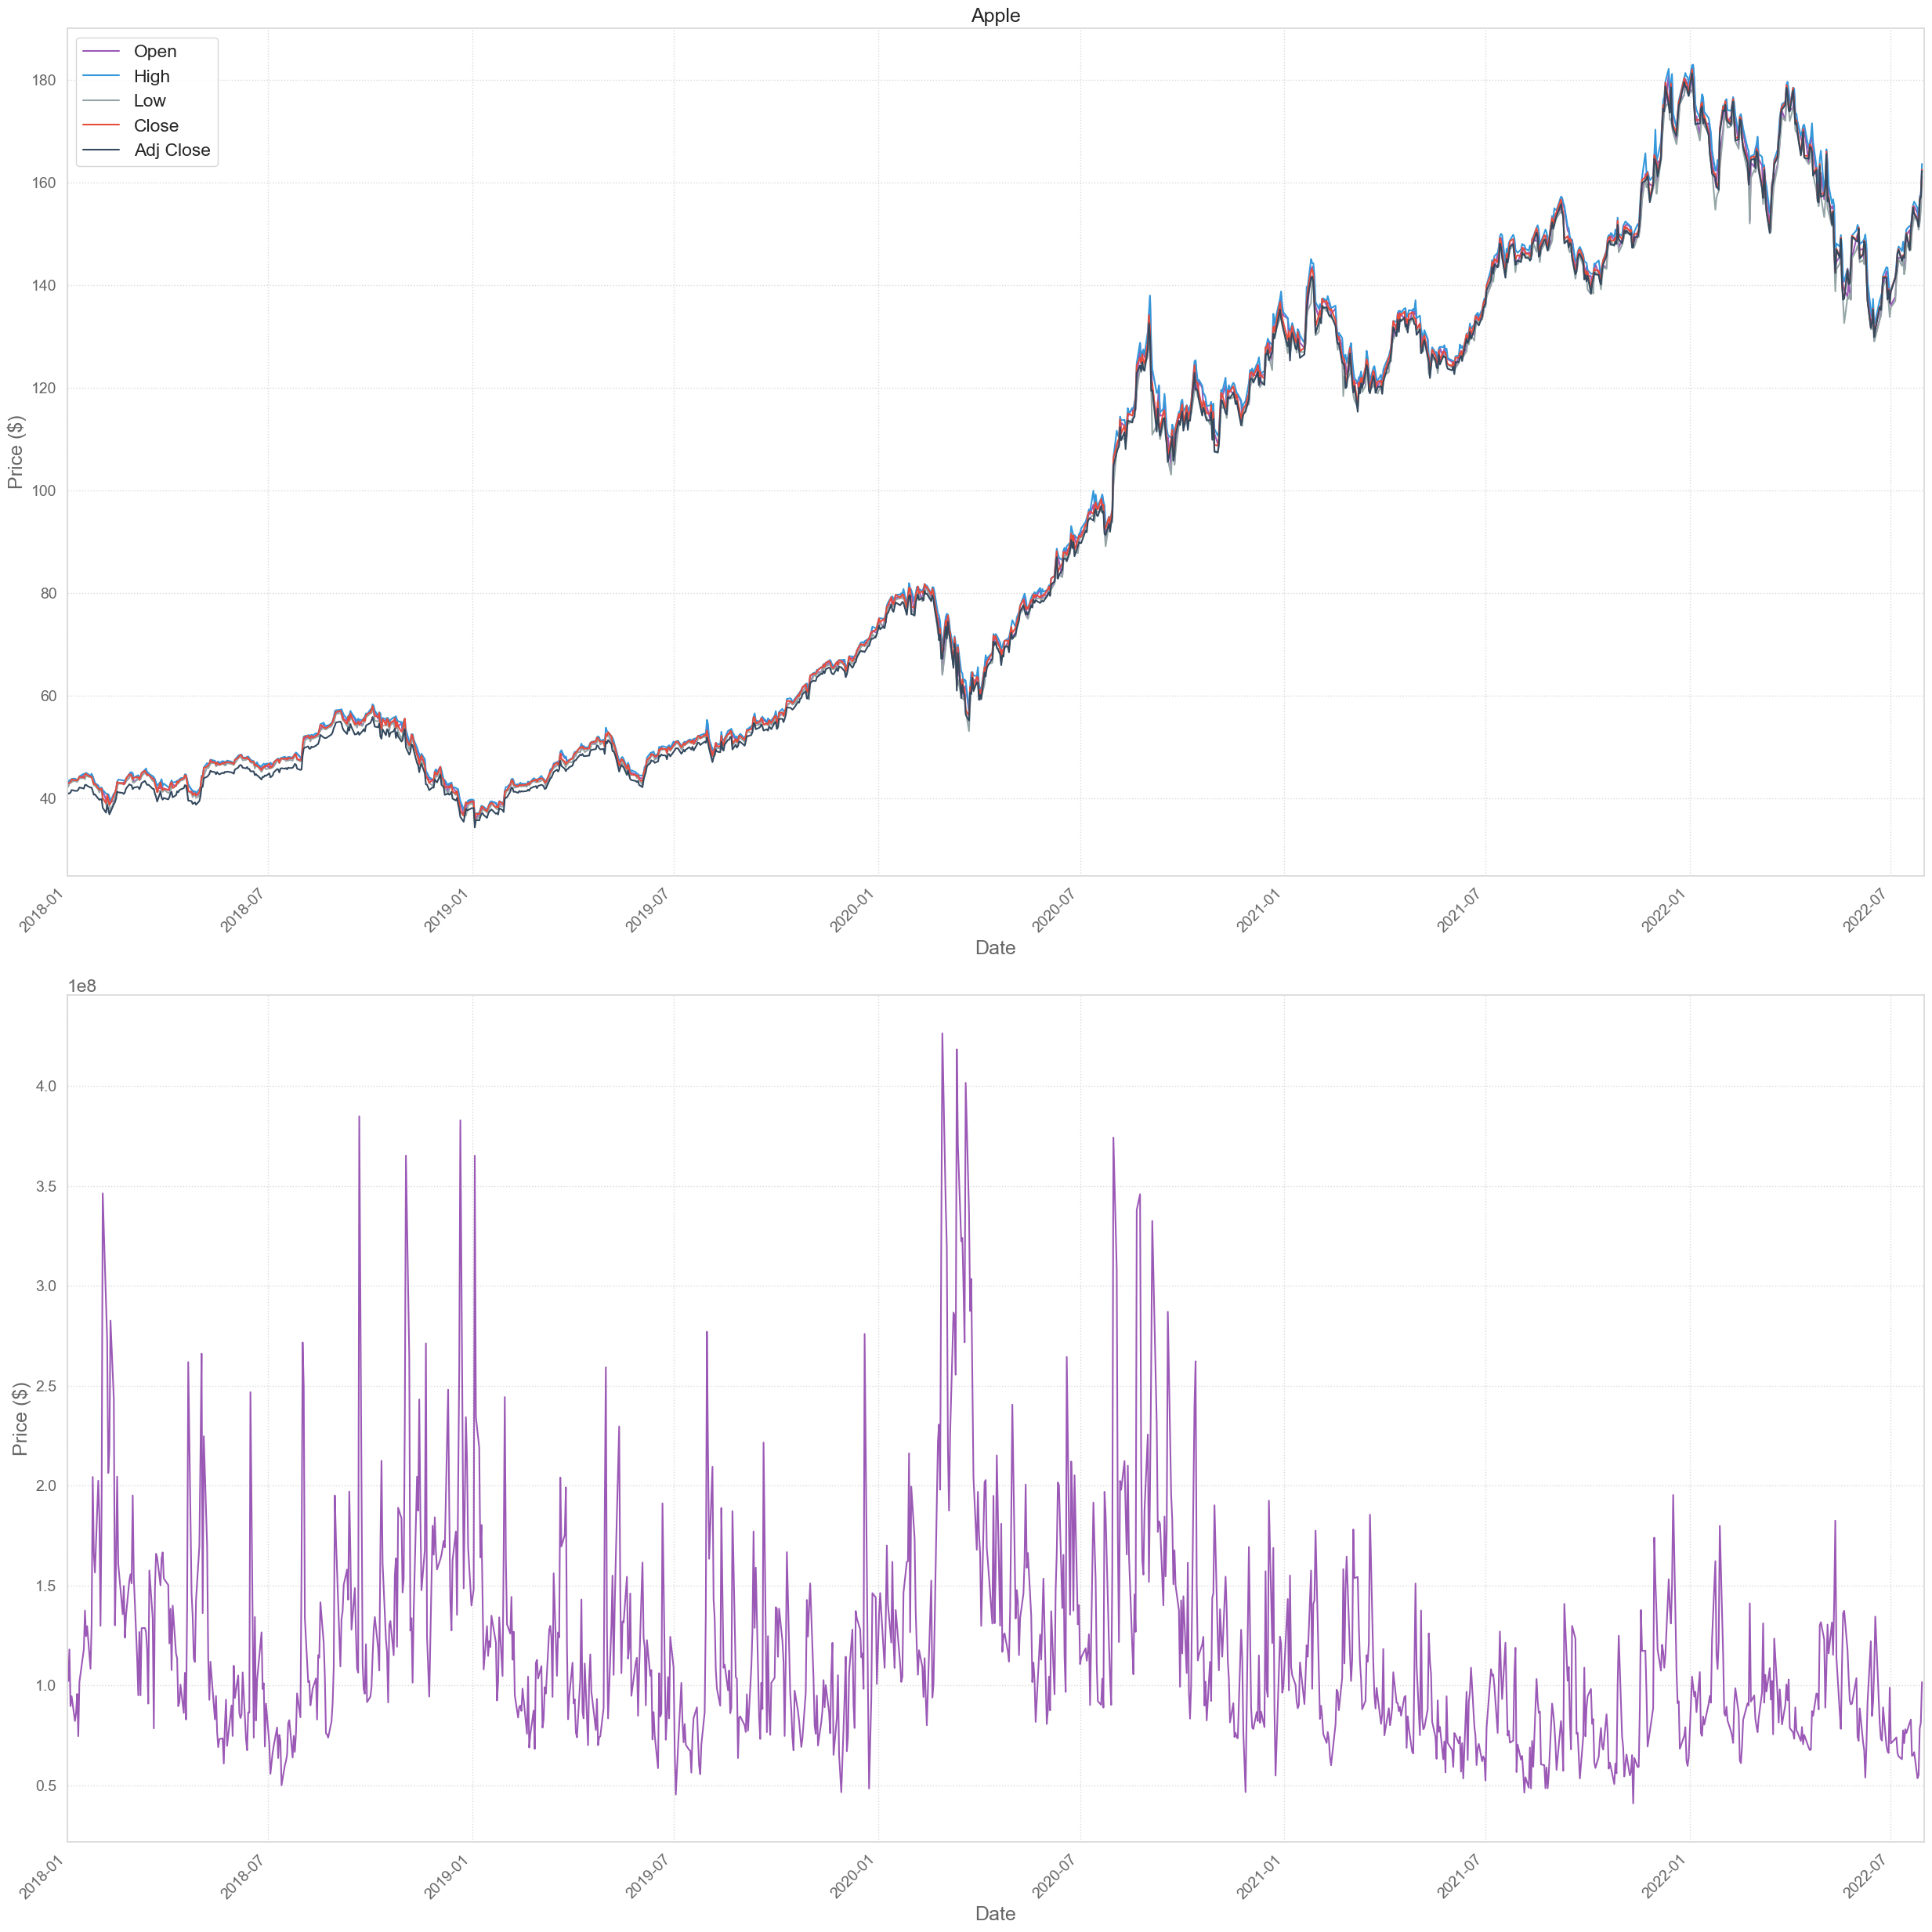

In [24]:
from logging.handlers import RotatingFileHandler


AAPL_data = data['01AAPL']

#set font size

sns.set(font_scale=1.5)

#set graph style

sns.set_style({"axes.facecolor":"1.0", "axes.edgecolor":"0.85","axes.grid": True, "grid.color":"0.85",
               "grid.linestyle":":", "axes.labelcolor":'0.4',"xtick.color":"0.4", "ytick.color": "0.4"}) 

#set palette
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(flatui)

#define time period to consider for figure

start_date = "2018-01-01"
end_date = "2022-07-31"

#create figure
f, ax = plt.subplots(figsize=(25,25), nrows=2, ncols=1)

#plot apple open, high, low, close, adjusted close

AAPL_data.iloc[:,0:5].plot(fontsize=14, rot=45, xlim=(pd.Timestamp(start_date),pd.Timestamp(end_date)),
                        ylim=(25,190),
                        ax = ax[0])

#add x and y labels
ax[0].set_xlabel("Date",fontsize=18)
ax[0].set_ylabel("Price ($)", fontsize=18)
ax[0].set_title("Apple")

#plot apple volume

AAPL_data.iloc[:,5].plot(fontsize=14, rot=45, xlim = (pd.Timestamp(start_date), pd.Timestamp(end_date)), 
                          ax = ax[1])
#add x,y labels

ax[1].set_xlabel("Date",fontsize=18)
ax[1].set_ylabel("Price ($)", fontsize=18)                   

#tight layout
plt.tight_layout()

#save fig
plt.savefig("AAPL Stock Price Summar.png",dpi=1080)


In [14]:
AAPL_data

,Open,High,Low,Close,Adj Close,Volume
2017-08-22,39.557499,40.000000,39.505001,39.945000,37.910412,86418400.0
2017-08-23,39.767502,40.117500,39.720001,39.994999,37.957874,77596400.0
2017-08-24,40.107498,40.185001,39.637501,39.817501,37.789413,79275600.0
2017-08-25,39.912498,40.139999,39.817501,39.965000,37.929405,101920400.0
2017-08-28,40.035000,40.500000,39.982498,40.367500,38.311390,103864000.0
...,...,...,...,...,...,...
2022-07-25,154.009995,155.039993,152.279999,152.949997,152.737839,53623900.0
2022-07-26,152.259995,153.089996,150.800003,151.600006,151.389725,55138700.0
2022-07-27,152.580002,157.330002,152.160004,156.789993,156.572510,78620700.0
2022-07-28,156.979996,157.639999,154.410004,157.350006,157.131744,81378700.0


In [15]:
AAPL_data.iloc[0]

Open         3.955750e+01
High         4.000000e+01
Low          3.950500e+01
Close        3.994500e+01
Adj Close    3.791041e+01
Volume       8.641840e+07
Name: 2017-08-22 00:00:00, dtype: float64

iloc fxn slices rows then columns, [:-2,0:-1]
all but last 2 rows, include all columns but the last one, (volume)

In [16]:
AAPL_data.iloc[:-4]

,Open,High,Low,Close,Adj Close,Volume
2017-08-22,39.557499,40.000000,39.505001,39.945000,37.910412,86418400.0
2017-08-23,39.767502,40.117500,39.720001,39.994999,37.957874,77596400.0
2017-08-24,40.107498,40.185001,39.637501,39.817501,37.789413,79275600.0
2017-08-25,39.912498,40.139999,39.817501,39.965000,37.929405,101920400.0
2017-08-28,40.035000,40.500000,39.982498,40.367500,38.311390,103864000.0
...,...,...,...,...,...,...
2022-07-19,147.919998,151.229996,146.910004,151.000000,150.790543,82982400.0
2022-07-20,151.119995,153.720001,150.369995,153.039993,152.827713,64823400.0
2022-07-21,154.500000,155.570007,151.940002,155.350006,155.134521,65086600.0
2022-07-22,155.389999,156.279999,153.410004,154.089996,153.876251,66675400.0


In [17]:
AAPL_data.iloc[:,:3]

,Open,High,Low
2017-08-22,39.557499,40.000000,39.505001
2017-08-23,39.767502,40.117500,39.720001
2017-08-24,40.107498,40.185001,39.637501
2017-08-25,39.912498,40.139999,39.817501
2017-08-28,40.035000,40.500000,39.982498
...,...,...,...
2022-07-25,154.009995,155.039993,152.279999
2022-07-26,152.259995,153.089996,150.800003
2022-07-27,152.580002,157.330002,152.160004
2022-07-28,156.979996,157.639999,154.410004


In [18]:
data.keys()

dict_keys(['01AAPL', '02NFLX', '03META', '04GOOG', '05TSLA', '06AMZN'])

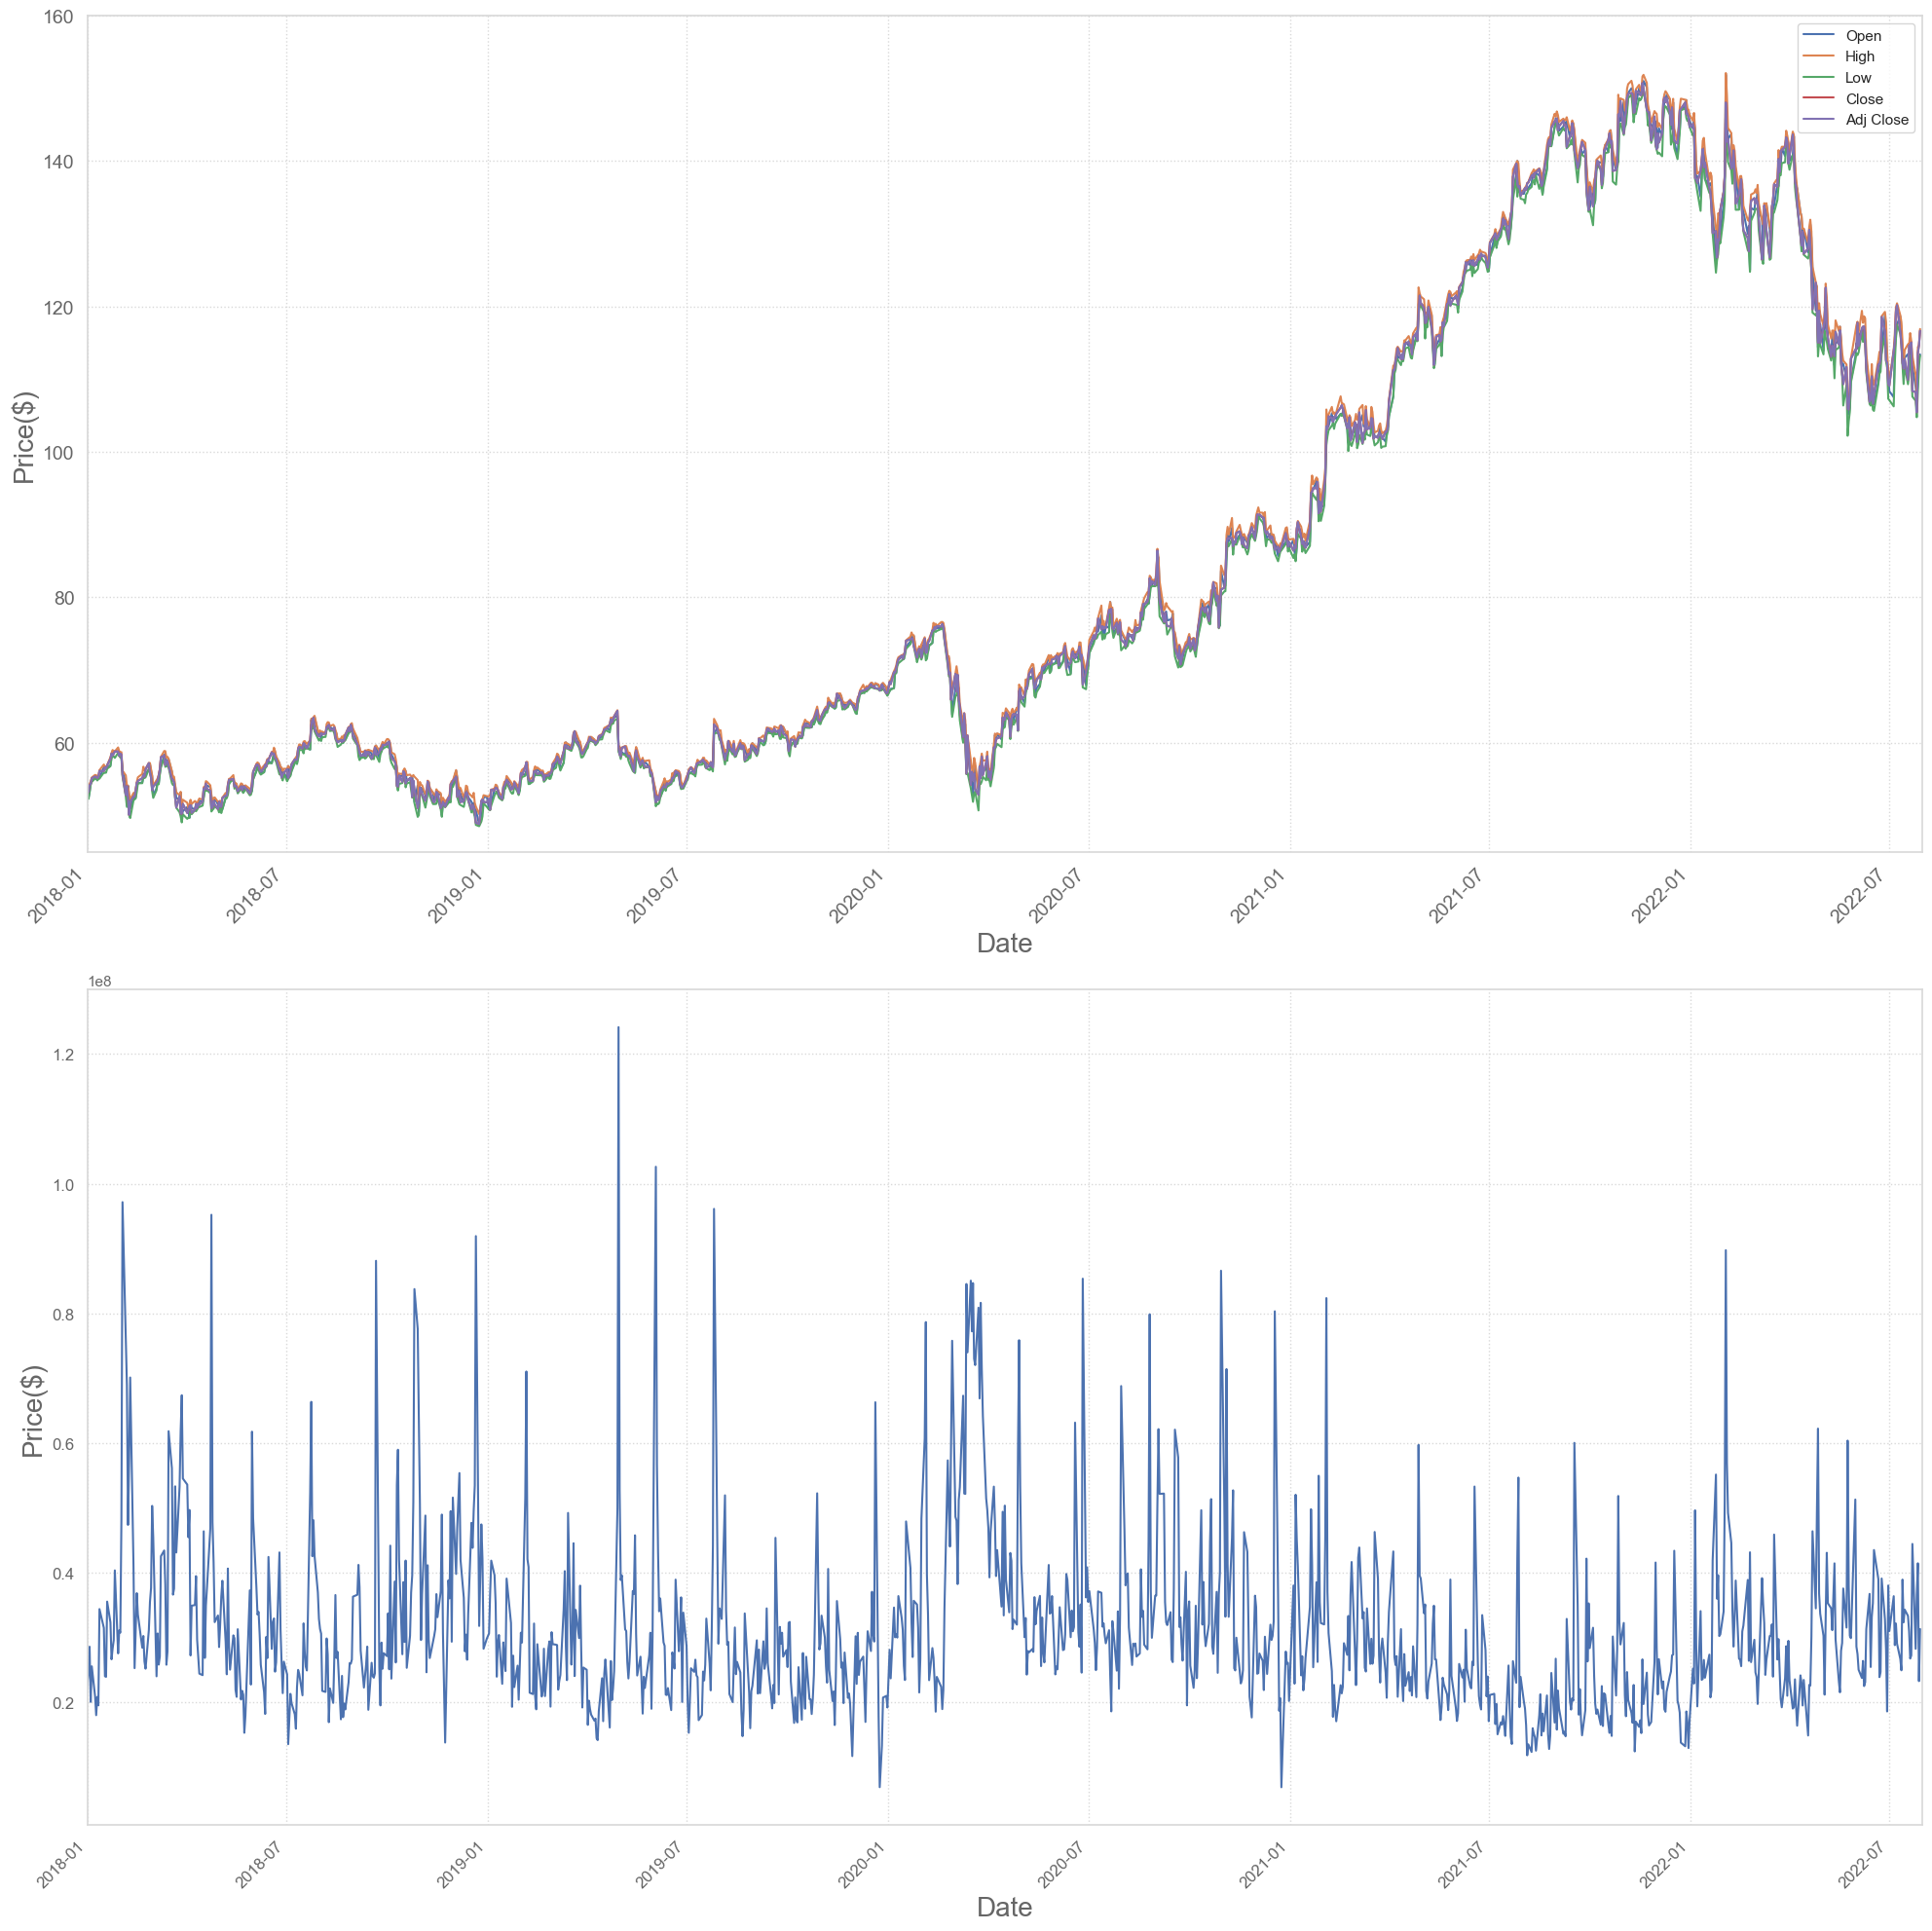

In [33]:
GOOG_data= data['04GOOG']

sns.set(font_scale=1)
sns.set_style({"axes.facecolor":"1.0", "axes.edgecolor":"0.85","axes.grid": True, "grid.color":"0.85",
               "grid.linestyle":":", "axes.labelcolor":'0.4',"xtick.color":"0.4", "ytick.color": "0.4"})

#flatui=["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.color_palette("rocket", as_cmap=True)

start_date = "2018-01-01"
end_date = "2022-07-31"

f, ax = plt.subplots(figsize=(20,20), nrows=2, ncols=1)

GOOG_data.iloc[:,:5].plot(fontsize=14, rot=45, xlim=(pd.Timestamp(start_date),pd.Timestamp(end_date)),
                            ylim=(45,160), ax = ax[0])

ax[0].set_xlabel("Date", fontsize=20)
ax[0].set_ylabel("Price($)", fontsize=20)

GOOG_data.iloc[:,5].plot(fontsize=12,rot=45,xlim=(pd.Timestamp(start_date),pd.Timestamp(end_date)),
                         ax=ax[1])

ax[1].set_xlabel("Date", fontsize=20)
ax[1].set_ylabel("Price($)", fontsize=20)

plt.tight_layout()

#plt.savefig("Google Stock Price Summary.png",dpi=1080)

                        